In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
liga = pd.read_csv("Liga", sep = "\t", encoding = "latin-1", index_col = 0)
total = pd.read_csv("Total", sep = "\t", encoding = "latin-1", index_col = 0)

total["Goles+Asistencias"] = total["Goles"] + total["Asistencias"]
total["Goles&Asis_por_minuto"] = total["Minutos"] / total["Goles+Asistencias"]

total = total.replace(np.inf, np.nan)
total.fillna(0, inplace = True)

In [3]:
def visualizar(df, columna):
        
    columna_sorted = df.sort_values(columna, ascending = True, na_position = "first")[-11:]
    ax = columna_sorted[columna].plot(kind = "barh", colormap = "winter", alpha = 0.5, width = 0.35)

    for i, v in enumerate(df.sort_values(columna, ascending = True, na_position = "first")[-11:][columna].values):  
        ax.text(v, i, "{0:.2f}".format(v), fontsize = 10, color = 'black')

    ax.yaxis.set_ticklabels(columna_sorted["Nombre"])

    ax.set_title(columna)
    ax.set_xlabel(columna)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

Gráficos

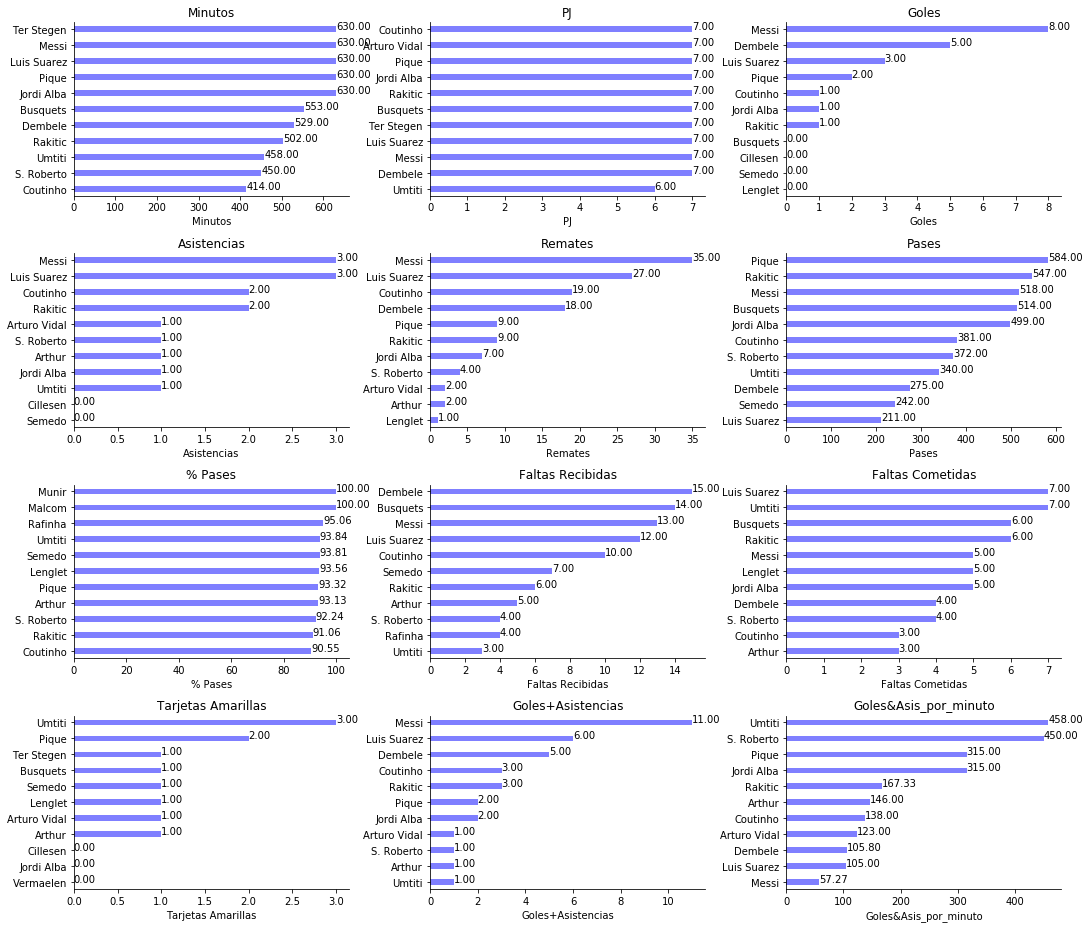

In [4]:
plt.figure(figsize = (15, 13))

plt.subplot(4, 3, 1)
visualizar(total, "Minutos")

plt.subplot(4, 3, 2)
visualizar(total, "PJ")

plt.subplot(4, 3, 3)
visualizar(total, "Goles")

plt.subplot(4, 3, 4)
visualizar(total, "Asistencias")

plt.subplot(4, 3, 5)
visualizar(total, "Remates")

plt.subplot(4, 3, 6)
visualizar(total, "Pases")

plt.subplot(4, 3, 7)
visualizar(total, "% Pases")

plt.subplot(4, 3, 8)
visualizar(total, "Faltas Recibidas")

plt.subplot(4, 3, 9)
visualizar(total, "Faltas Cometidas")

plt.subplot(4, 3, 10)
visualizar(total, "Tarjetas Amarillas")

plt.subplot(4, 3, 11)
visualizar(total, "Goles+Asistencias")

plt.subplot(4, 3, 12)
visualizar(total, "Goles&Asis_por_minuto")

plt.tight_layout()
plt.show()